In [169]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as soup
import pandas as pd
import requests


In [170]:
driver = webdriver.Chrome()
driver.get("https://www.ewg.org/tapwater/")

In [171]:
#cont_to_site = driver.find_element(By.XPATH,'/html/body/div[1]/div[7]/button')

In [172]:
element = driver.find_element(By.XPATH,'/html/body/main/section[1]/form/input[1]')


In [173]:
element.send_keys('97045')

In [174]:
button = driver.find_element(By.XPATH,'/html/body/main/section[1]/form/input[3]').click()


In [175]:
selection = driver.find_element(By.XPATH, '/html/body/div[3]/main/figure[1]/table/tbody/tr[3]/td[1]/a').click()
#/html/body/div[3]/main/figure[1]/table/tbody/tr[2]/td[1]/a
#/html/body/div[3]/main/figure[1]/table/tbody/tr[10]/td[1]/a

In [176]:
# Parse the resulting html with soup
page_source = driver.page_source
html_soup = soup(page_source, 'html.parser')

<html class="" lang="en"><head><script src="https://api-public.addthis.com/url/shares.json?url=http%3A%2F%2Fwww.ewg.org%2Ftapwater%2Fsystem.php%3Fpws%3DOR4100635&amp;callback=_ate.cbs.rcb_af2n0" type="text/javascript"></script><script src="https://api-public.addthis.com/url/shares.json?url=https%3A%2F%2Fwww.ewg.org%2Ftapwater%2Fsystem.php%3Fpws%3DOR4100635&amp;callback=_ate.cbs.rcb_d1t0" type="text/javascript"></script><script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script async="" src="https://i.clarity.ms/s/0.6.34/clarity.js"></script><script async="" src="https://www.lightboxcdn.com/vendor/a3241e66-5c6a-4d48-8161-225ef2c02084/lightbox_inline.js?mb=1652047690654" type="text/javascript"></script><script src="https://m.addthis.com/live/red_lojson/300lo.json?si=62783f4a91b6608d&amp;bkl=0&amp;bl=1&amp;pdt=437&amp;sid=62783f4a91b6608d&amp;pub=ra-54611daa33276138&amp;rev=v8.28.8-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.ewg.o
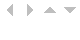

In [177]:
html_soup

In [178]:
Utility = html_soup.find('h1').text
Utility

'Sunrise Water Authority'

In [179]:
data_box = html_soup.find_all('div', class_='contaminant-name')

In [180]:
data_box

[<div class="contaminant-name"> <h3>Arsenic</h3><span class="potentital-effect"> Potential Effect: cancer</span><span class="detect-times-greater-than">175x</span><span class="potentital-effect"> EWG'S HEALTH GUIDELINE</span><div class="detect-levels-overview flex"><div class="flex-sb mb10"><span>THIS UTILITY</span><span>0.700 ppb</span></div><div class="flex-sb mb10"><span>EWG HEALTH GUIDELINE</span><span>0.004 ppb</span></div><div class="flex-sb"><span>LEGAL LIMIT</span><span>10 ppb</span></div></div><a class="btn-contam-details">DETAILS</a></div>,
 <div class="contaminant-name"> <h3>Chromium (hexavalent)</h3><span class="potentital-effect"> Potential Effect: cancer</span><span class="detect-times-greater-than">14x</span><span class="potentital-effect"> EWG'S HEALTH GUIDELINE</span><div class="detect-levels-overview flex"><div class="flex-sb mb10"><span>THIS UTILITY</span><span>0.277 ppb</span></div><div class="flex-sb mb10"><span>EWG HEALTH GUIDELINE</span><span>0.02 ppb</span></div

In [181]:
len(data_box)

21

In [193]:
for i in range(len(data_box)-1):
    contaminant_name = data_box[i].find('h3').text
    print(contaminant_name)

Arsenic
Chromium (hexavalent)
Haloacetic acids (HAA5)†
Haloacetic acids (HAA9)†
Nitrate
Nitrate and nitrite
Radium, combined (-226 & -228)
Total trihalomethanes (TTHMs)†
Barium
Bromochloromethane
Chlorate
Chromium (total)
Cobalt
Fluoride
Germanium
Manganese
Molybdenum
Nitrite
Strontium
Vanadium


In [199]:
contaminant_list = []

for i in range(len(data_box)):
    data = data_box[i].find_all('span')
    data_measure = []
    d = {
        'Utility' : Utility,
        'Contaminant': '', 
        'Utility Measuremnt':'', 
        'EWG HEALTH GUIDELINE': '',
        'Legal Limit':'' 
    }
       
    for j in range(len(data)):
        measurement = data[j].text
        #print(measurement)
        data_measure.append(measurement)
        #print(data_measure)
        
    try:
        d['Utility Measuremnt'] = data_measure[data_measure.index('THIS UTILITY')+1]
    except ValueError:
        print("A value error arose")
    except:
        print("Something else went wrong")
    try:
        d['EWG HEALTH GUIDELINE'] = data_measure[data_measure.index('EWG HEALTH GUIDELINE')+1]
    except ValueError:
        print("A value error arose")
    except:
        print("Something else went wrong") 
    try:
        d['Legal Limit'] = data_measure[data_measure.index('LEGAL LIMIT')+1]
    except ValueError:
        print("A value error arose")
    except:
        print("Something else went wrong") 
    
    contaminant_list.append(d)
    
for i in range(len(data_box)-1):
    contaminant_name = data_box[i].find('h3').text
    print(contaminant_name)
    contaminant_list[i]['Contaminant'] = contaminant_name
    # contaminants = []
# for i in range(len(data_box)-1):
#     contaminant = data_box[i].find('h3').text
#     contaminants.append(contaminant)
#     contaminant_list[i]['Contaminant'] = contaminant



A value error arose
A value error arose
A value error arose
A value error arose
A value error arose
A value error arose
A value error arose
A value error arose
A value error arose
A value error arose
A value error arose
A value error arose
A value error arose
A value error arose
A value error arose
A value error arose
A value error arose
A value error arose
Arsenic
Chromium (hexavalent)
Haloacetic acids (HAA5)†
Haloacetic acids (HAA9)†
Nitrate
Nitrate and nitrite
Radium, combined (-226 & -228)
Total trihalomethanes (TTHMs)†
Barium
Bromochloromethane
Chlorate
Chromium (total)
Cobalt
Fluoride
Germanium
Manganese
Molybdenum
Nitrite
Strontium
Vanadium


In [200]:
contaminant_list

[{'Utility': 'Sunrise Water Authority',
  'Contaminant': 'Arsenic',
  'Utility Measuremnt': '0.700 ppb',
  'EWG HEALTH GUIDELINE': '0.004 ppb',
  'Legal Limit': '10 ppb'},
 {'Utility': 'Sunrise Water Authority',
  'Contaminant': 'Chromium (hexavalent)',
  'Utility Measuremnt': '0.277 ppb',
  'EWG HEALTH GUIDELINE': '0.02 ppb',
  'Legal Limit': ''},
 {'Utility': 'Sunrise Water Authority',
  'Contaminant': 'Haloacetic acids (HAA5)†',
  'Utility Measuremnt': '24.5 ppb',
  'EWG HEALTH GUIDELINE': '0.1 ppb',
  'Legal Limit': '60 ppb'},
 {'Utility': 'Sunrise Water Authority',
  'Contaminant': 'Haloacetic acids (HAA9)†',
  'Utility Measuremnt': '26.4 ppb',
  'EWG HEALTH GUIDELINE': '0.06 ppb',
  'Legal Limit': ''},
 {'Utility': 'Sunrise Water Authority',
  'Contaminant': 'Nitrate',
  'Utility Measuremnt': '0.606 ppm',
  'EWG HEALTH GUIDELINE': '0.14 ppm',
  'Legal Limit': '10 ppm'},
 {'Utility': 'Sunrise Water Authority',
  'Contaminant': 'Nitrate and nitrite',
  'Utility Measuremnt': '0.800 

In [168]:
df = pd.DataFrame(contaminant_list)
df

,Utility,Contaminant,Utility Measuremnt,EWG HEALTH GUIDELINE,Legal Limit
0,Sunrise Water Authority,Arsenic,0.700 ppb,0.004 ppb,10 ppb
1,Sunrise Water Authority,Chromium (hexavalent),0.277 ppb,0.02 ppb,
2,Sunrise Water Authority,Haloacetic acids (HAA5)†,24.5 ppb,0.1 ppb,60 ppb
3,Sunrise Water Authority,Haloacetic acids (HAA9)†,26.4 ppb,0.06 ppb,
4,Sunrise Water Authority,Nitrate,0.606 ppm,0.14 ppm,10 ppm
5,Sunrise Water Authority,Nitrate and nitrite,0.800 ppm,0.14 ppm,10 ppm
6,Sunrise Water Authority,"Radium, combined (-226 & -228)",0.24 pCi/L,0.05 pCi/L,5 pCi/L
7,Sunrise Water Authority,Total trihalomethanes (TTHMs)†,33.8 ppb,0.15 ppb,80 ppb
8,Sunrise Water Authority,Barium,6.20 ppb,700 ppb,"2,000 ppb"
9,Sunrise Water Authority,Bromochloromethane,0.0500 ppb,,


In [151]:
df_pivot = pd.pivot(df, index=["Utility"], columns=['Contaminant'])

In [152]:
df_pivot

Utility Measuremnt                        \
Contaminant                                  Barium    Fluoride   
Utility                                                           
South Fork Water Board                     2.89 ppb  0.0286 ppm   

                                                            \
Contaminant            Haloacetic acids (HAA5)†    Nitrate   
Utility                                                      
South Fork Water Board                 21.6 ppb  0.286 ppm   

                                                                           \
Contaminant            Nitrate and nitrite Total trihalomethanes (TTHMs)†   
Utility                                                                     
South Fork Water Board           0.250 ppm                       29.8 ppb   

                       EWG HEALTH GUIDELINE                    ...            \
Contaminant                                   Barium Fluoride  ...   Nitrate   
Utility                                                        ...             
South Fork Water Board                       700 ppb           ...  0.14 ppm   

                                                                           \
Contaminant            Nitrate and nitrite Total trihalomethanes (TTHMs)†   
Utility                                                                     
South Fork Water Board            0.14 ppm                       0.15 ppb   

                       Legal Limit                      \
Contaminant                            Barium Fluoride   
Utility                                                  
South Fork Water Board              2,000 ppb    4 ppm   

                                                                             \
Contaminant            Haloacetic acids (HAA5)† Nitrate Nitrate and nitrite   
Utility                                                                       
South Fork Water Board                   60 ppb  10 ppm              10 ppm   

                                                       
Contaminant            Total trihalomethanes (TTHMs)†  
Utility                                                
South Fork Water Board                         80 ppb  

[1 rows x 21 columns]

In [11]:
url = requests.get(zip_url)
table = pd.read_html(url.text)

In [12]:
table

[                              Utility name              City  \
 0  North Clackamas County Water Commission   Oregon City, OR   
 1                   South Fork Water Board   Oregon City, OR   
 2                  Sunrise Water Authority  Happy Valley, OR   
 3        Clackamas River Water - Clackamas     Clackamas, OR   
 4              Lake Oswego Municipal Water   Lake Oswego, OR   
 5                              Oregon City   Oregon City, OR   
 6                 Oak Lodge Water District     Milwaukie, OR   
 7                        City of West Linn     West Linn, OR   
 8                        City of Milwaukie     Milwaukie, OR   
 9                      City of Wilsonville   Wilsonville, OR   
 
               People served  
 0  Population served:87,700  
 1  Population served:65,000  
 2  Population served:46,228  
 3  Population served:41,338  
 4  Population served:36,453  
 5  Population served:33,940  
 6  Population served:30,000  
 7  Population served:25,002  
 8  

In [13]:
table[0]

,Utility name,City,People served
0,North Clackamas County Water Commission,"Oregon City, OR","Population served:87,700"
1,South Fork Water Board,"Oregon City, OR","Population served:65,000"
2,Sunrise Water Authority,"Happy Valley, OR","Population served:46,228"
3,Clackamas River Water - Clackamas,"Clackamas, OR","Population served:41,338"
4,Lake Oswego Municipal Water,"Lake Oswego, OR","Population served:36,453"
5,Oregon City,"Oregon City, OR","Population served:33,940"
6,Oak Lodge Water District,"Milwaukie, OR","Population served:30,000"
7,City of West Linn,"West Linn, OR","Population served:25,002"
8,City of Milwaukie,"Milwaukie, OR","Population served:20,500"
9,City of Wilsonville,"Wilsonville, OR","Population served:22,729"
